# Data Training and Testing

In [286]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

from sklearn import tree, preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from tqdm import tqdm

from sklearn.metrics import \
    classification_report, \
    plot_confusion_matrix, \
    confusion_matrix, \
    roc_curve, \
    auc, \
    f1_score, accuracy_score, recall_score

sns.set_theme()

In [268]:
def load_data(path) -> pd.DataFrame:
    df = pd.read_csv(path)
    return df

def plot_ROC(y_test, y_pred, plt_config):    
        fpr, tpr, threshold = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=plt_config['figsize'])
        plt.title('ROC')
        plt.plot(fpr, tpr, 'b', label='ROC-AUC = %0.2f' % roc_auc)
        plt.plot([0,1], [0,1], 'y--', label='baseline')

        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.legend(loc='best')
        plt.show()

def decisionTreeTrain(X_train, y_train, max_depth):
    clf = tree.DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)
    return clf

def scalar_normalize(X_train, X_test):
    min_max_scalar = preprocessing.MinMaxScaler()
    X_train_minmax = min_max_scalar.fit_transform(X_train)
    X_test_minmax = min_max_scalar.transform(X_test)
    X_train_scaled = preprocessing.scale(X_train_minmax)
    X_test_scaled = preprocessing.scale(X_test_minmax)
    X_train_normalized = preprocessing.normalize(X_train_scaled, norm='l2')
    X_test_normalized = preprocessing.normalize(X_test_scaled, norm='l2')
    return X_train_normalized, X_test_normalized


In [269]:
df = load_data('../csv_data/user_1.csv')
# df = load_data('../csv_data/user_1_timewindow10.csv')
#df = load_data('../csv_data/user_1_timewindow30.csv')

In [270]:
df

,timestamp,dist_s,angle_s,mean_dist,min_dist,view_dist,average_mouse_speed,useful,useless,aiming,shooting,moving,class
0,2022-04-17 20:58:59,26038.7766,5335.904400,4680.693684,2434.740,70.125135,15.400000,24,23,0,0,10,0
1,2022-04-17 20:59:00,25684.6166,5135.366600,4620.476667,2434.740,69.905642,15.866667,24,26,0,0,11,0
2,2022-04-17 20:59:01,24995.0756,5139.418140,4620.476667,2434.740,69.661761,16.500000,25,25,0,0,12,0
3,2022-04-17 20:59:02,24067.1956,5110.712770,4550.625294,2434.740,69.955541,18.000000,25,26,0,0,13,0
4,2022-04-17 20:59:03,23124.8566,5129.021570,4270.173529,1152.770,71.497835,19.633333,26,29,0,0,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16945,2022-04-18 02:47:27,26906.5900,266.486249,1737.436167,766.278,85.998414,1.066667,0,0,0,0,0,0
16946,2022-04-18 02:47:28,28106.7400,266.486249,1855.028143,766.278,85.650050,1.066667,0,0,0,0,0,0
16947,2022-04-18 02:47:29,29373.6900,266.486249,1966.402125,766.278,85.379100,1.066667,0,0,0,0,0,0
16948,2022-04-18 02:47:30,30594.9000,266.486249,2080.828556,766.278,85.162340,1.066667,0,1,0,0,0,0


<AxesSubplot:ylabel='Frequency'>

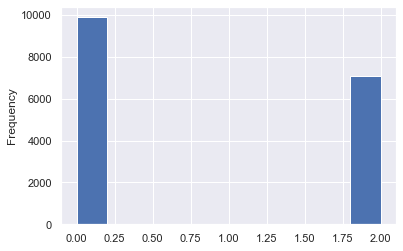

In [271]:
df['class'].plot.hist()

In [272]:
df = df.fillna(-10000)
# df = df.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
df = df.replace((np.inf, -np.inf), 0).reset_index(drop=True)

data_X = df.drop(columns = ['timestamp', 'class'])
data_y = df['class']

# data_y = data_y.replace(2, 1)

In [293]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3)

X_train

,dist_s,angle_s,mean_dist,min_dist,view_dist,average_mouse_speed,useful,useless,aiming,shooting,moving
3185,21382.903400,2401.733040,281.012536,52.1233,43.902016,11.466667,39,42,7,4,12
3571,7494.724000,3227.051368,-10000.000000,-10000.0000,-10000.000000,17.400000,32,50,3,2,30
16212,7680.887300,2347.247194,-10000.000000,-10000.0000,-10000.000000,3.366667,29,37,0,0,25
4330,7248.820200,2229.467391,3282.284615,2101.0200,65.339898,18.566667,42,46,0,0,26
13472,4923.072900,2238.871877,4118.956154,2541.0700,64.886459,20.333333,61,42,3,1,28
...,...,...,...,...,...,...,...,...,...,...,...
4281,6337.286500,1705.552830,1118.814727,308.6520,18.724261,20.133333,24,50,5,5,24
10573,5755.735600,509.091720,2298.350000,1892.9700,79.573519,1.400000,31,44,2,4,29
8475,55331.200000,1286.542810,2013.173667,52.3140,141.678702,6.433333,3,2,1,0,22
2097,9036.294900,4258.455070,-10000.000000,-10000.0000,120.036510,9.233333,34,36,2,1,27


In [294]:
# model = KNeighborsClassifier(n_neighbors=7)
# model.fit(X_train, y_train)
model = decisionTreeTrain(X_train, y_train, max_depth=4)

In [295]:
y_hat = model.predict(X_test)

rpt = classification_report(y_test, y_hat)
accuracy, recall, f1_s = accuracy_score(y_test, y_hat), recall_score(y_test, y_hat), f1_score(y_test, y_hat)
# print(rpt)
print(accuracy, recall, f1_s)



# fig = plt.figure(figsize=(50,40))
# _ = tree.plot_tree(model, feature_names=X_train.columns, \
#     class_names = ['normal', 'cheating'], filled = True)

ValueError: pos_label=1 is not a valid label. It should be one of [0, 2]

In [277]:
# try to do binary classification
data_X = data_X
binary_data_y = data_y.copy()
binary_data_y[binary_data_y>0] = 1

In [278]:
X_train, X_test, y_train, y_test = train_test_split(data_X, binary_data_y, test_size=0.3)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      2944
           1       0.90      0.87      0.89      2141

    accuracy                           0.91      5085
   macro avg       0.91      0.90      0.90      5085
weighted avg       0.91      0.91      0.91      5085



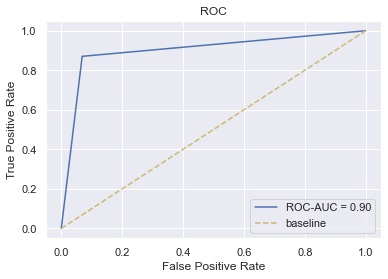

In [279]:
plt_config = {
    'figsize': (6, 4),
    # 'model': ad.mode + ' Detection'
}

plot_ROC(y_test, y_hat, plt_config)

In [280]:
# try SVM
svmclf = make_pipeline(preprocessing.StandardScaler(), SVC(kernel = 'rbf', gamma='auto', degree=1))
svmclf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(degree=1, gamma='auto'))])

In [281]:
y_hat = svmclf.predict(X_test)

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2944
           1       0.95      0.87      0.91      2141

    accuracy                           0.92      5085
   macro avg       0.93      0.92      0.92      5085
weighted avg       0.93      0.92      0.92      5085

